# IMPORT LIBRARY

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [73]:
data = pd.read_csv('K03_counter_strike_2.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT


In [74]:
df.duplicated().sum()

39

In [77]:
print(data['round_winner'].unique())

['CT' 'T']


# PREPROCESSING DATA

In [78]:
from sklearn.preprocessing import LabelEncoder
for col in ['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'round_winner']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    data
    print (data['time_left'],data['ct_score'],data['t_score'],data['map'],data['bomb_planted'],data['ct_health'],data['t_health'],data['ct_armor'],data['t_armor'],data['ct_money'],data['t_money'],data['ct_helmets'],data['t_helmets'],data['round_winner'])

0       608
1       542
2       468
3       394
4       607
       ... 
1995    383
1996    205
1997     50
1998    601
1999    529
Name: time_left, Length: 2000, dtype: int64 0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1995    7.0
1996    7.0
1997    7.0
1998    7.0
1999    7.0
Name: ct_score, Length: 2000, dtype: float64 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1995    10.0
1996    10.0
1997    10.0
1998    11.0
1999    11.0
Name: t_score, Length: 2000, dtype: float64 0       de_dust2
1       de_dust2
2       de_dust2
3       de_dust2
4       de_dust2
          ...   
1995    de_train
1996    de_train
1997    de_train
1998    de_train
1999    de_train
Name: map, Length: 2000, dtype: object 0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998    False
1999    False
Name: bomb_planted, Length: 2000, dtype: bool 0       500.0
1       500.0
2     

In [81]:
#menentukan data x dan y
x = data.drop('round_winner', axis = 1)
y =data['round_winner']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state =0)

In [83]:
print (x_train)

      time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
1719        331         4        3    2             0        208       319   
1702        608         4        1    2             0        274       319   
1287          1        10        9    3             1         39        55   
482         389         0        1    3             0         40        16   
768         388         9        9    1             0         40       236   
...         ...       ...      ...  ...           ...        ...       ...   
835         605         3        1    3             0        274       319   
1216        285         4        5    3             0        135       308   
1653        532        14        8    6             0        274       319   
559         460         7        9    3             0        274       313   
684         494         6        2    1             0        274       319   

      ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helme

In [84]:
print(y_train)

1719    1
1702    1
1287    1
482     1
768     1
       ..
835     0
1216    1
1653    0
559     0
684     1
Name: round_winner, Length: 1400, dtype: int32


In [85]:
print (x_test)

      time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
405         436        11        7    0             0        274       319   
1190        604         3        3    3             0        274       319   
1132        310        13        6    4             0         40        14   
731         388         7        7    1             0         87       262   
1754        388         5        7    2             0        208       139   
...         ...       ...      ...  ...           ...        ...       ...   
841         154         3        1    3             1         40       236   
108         584         0        1    2             0        274       319   
665         212         4        1    1             1         35        38   
1214        403         4        5    3             0        257       319   
2           468         0        0    0             0        200       246   

      ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helme

In [86]:
print (y_test)

405     0
1190    1
1132    0
731     1
1754    1
       ..
841     1
108     1
665     1
1214    1
2       0
Name: round_winner, Length: 600, dtype: int32


# ACCURATION

In [87]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=2)
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [88]:
predict_DT = model_DT.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score
print ("akurasi round winner: ", accuracy_score(y_test, predict_DT)*100)

akurasi round winner:  69.66666666666667


# VISUALISASI

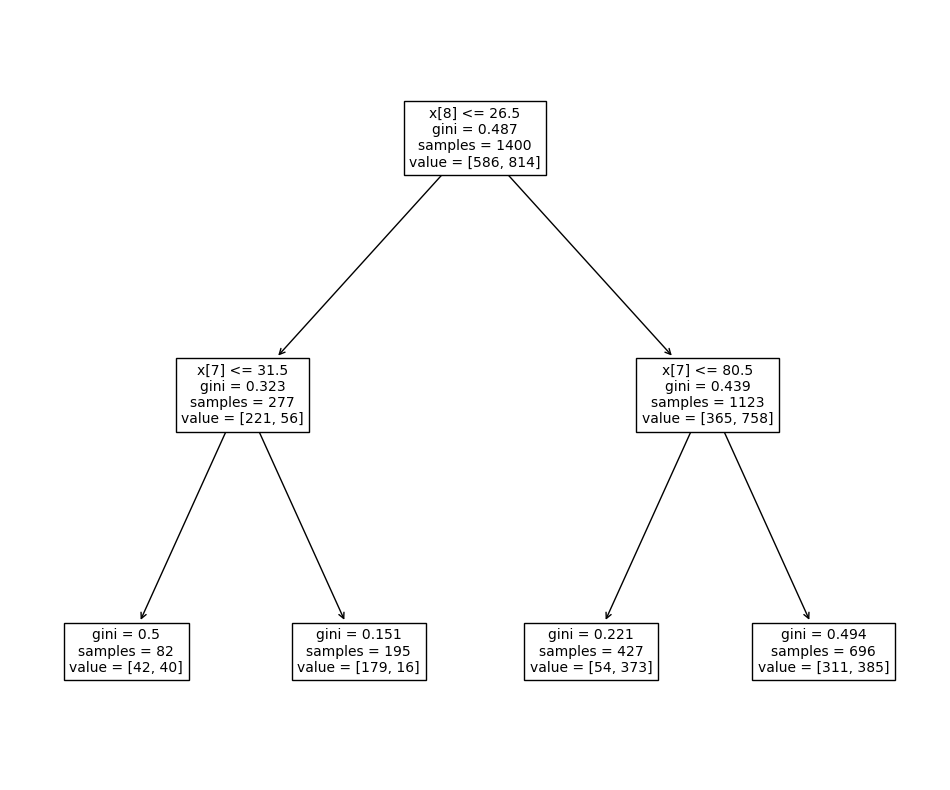

In [93]:
from sklearn.tree import plot_tree

plt.subplots(figsize=(12,10))
plot_tree (model_DT, fontsize =10)
plt.show()